In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --upgrade pip setuptools certifi

  Attempting uninstall: certifi
    Found existing installation: certifi 2025.1.31
    Uninstalling certifi-2025.1.31:
      Successfully uninstalled certifi-2025.1.31
Note: you may need to restart the kernel to use updated packages.


# Deep learning with Keras

Keras is a high-level deep learning library written in Python. It provides a user-friendly and intuitive interface for building and training neural networks. One of the key features of Keras is its ability to work with different backend engines, such as [TensorFlow](https://www.tensorflow.org/), [JAX](https://jax.readthedocs.io/en/latest/) and [PyTorch](https://pytorch.org/). It offers a wide range of pre-defined layers, including `convolutional layers`, `recurrent layers`, and `dense layers`, which can be easily stacked together to create complex network architectures. It also provides a variety of `loss functions`, `optimizers`, and `metrics` for training and evaluating models.

We will work with `feedforward neural networks`,  a special kind of neural networks using Keras.



## Outline

- Artificial neural networks (ANN)
- Demo's
    - Iris dataset
    - MNIST (handwritten digits)


# Artificial neural network

An artificial neural network (ANN) is a computational model inspired by the biological neural networks in the brain. It is a machine learning algorithm that can be trained to recognize patterns and make predictions based on input data. We will be working with the `feedforward neural network`, which are basically directed acyclic graphs. The networks consist of interconnected nodes, called `artificial neurons` or `units`, organized into `layers`. There is the `input` and `output` layers and in between them possibly one or more `hidden` layers.


__Single layer perceptron (SLP)__

SLP is the simplest feedforward neural network. It can solve various logical or classification problems.

$$
output = f(w \cdot x + b)
$$

with $f$ the `activation` function, e.g. `binary step`, `sigmoid`, `ReLU`, etc.

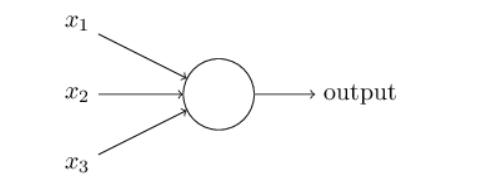

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
#Profile.activations()

## Activation functions

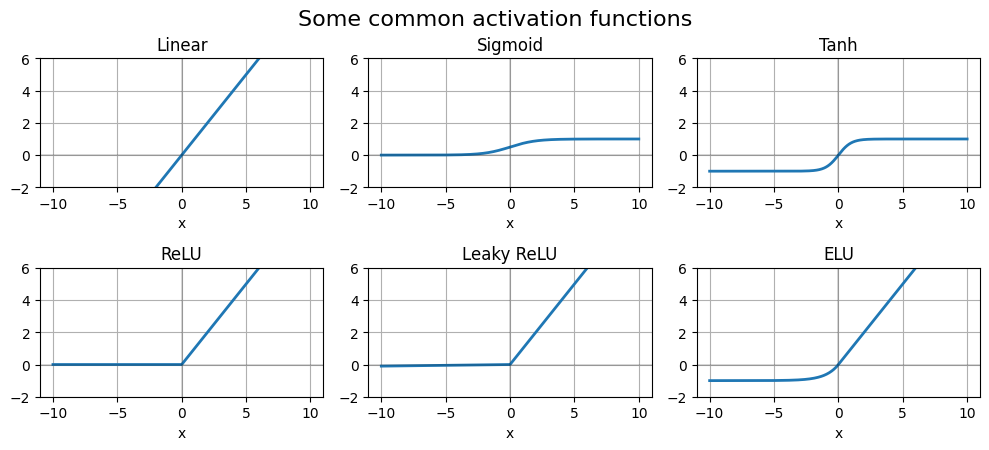

In [36]:
# Input range
x = np.linspace(-10, 10, 400)

# Define activation functions
def linear(x): return x
def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)
def relu(x): return np.maximum(0, x)
def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)
def elu(x, alpha=1.0): return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Dictionary of functions to plot
activations = {
    "Linear": linear,
    "Sigmoid": sigmoid,
    "Tanh": tanh,
    "ReLU": relu,
    "Leaky ReLU": leaky_relu,
    "ELU": elu
}

# Plotting
plt.figure(figsize=(10, 6))
for i, (name, func) in enumerate(activations.items(), 1):
    plt.subplot(3, 3, i)
    plt.plot(x, func(x),linewidth=2)
    plt.title(name)
    plt.grid(True)
    plt.xlabel('x')
    plt.axhline(0, color='black', linewidth=0.2)
    plt.axvline(0, color='black', linewidth=0.2)
    plt.ylim(-2, 6)
plt.tight_layout()
plt.suptitle("Some common activation functions", fontsize=16, y=1.02)
plt.show()


### Softmax

In [12]:
np.exp([4,0]).sum()

np.float64(55.598150033144236)

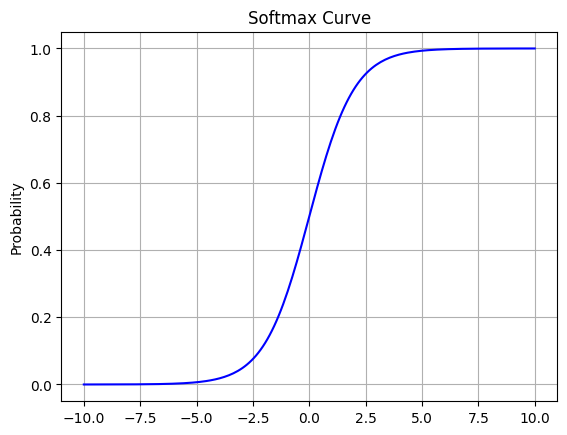

In [14]:
def softmax(x):
    e_x = np.exp(x)  # for numerical stability
    return e_x / e_x.sum()

x = np.linspace(-10, 10, 200)

# Compute softmax probabilities for class 1 in a 2-class system [x, 0]
softmax_class1 = [softmax([i, 0])[0] for i in x]

# Plot the softmax curve
plt.plot(x, softmax_class1, color='blue')
plt.title("Softmax Curve")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

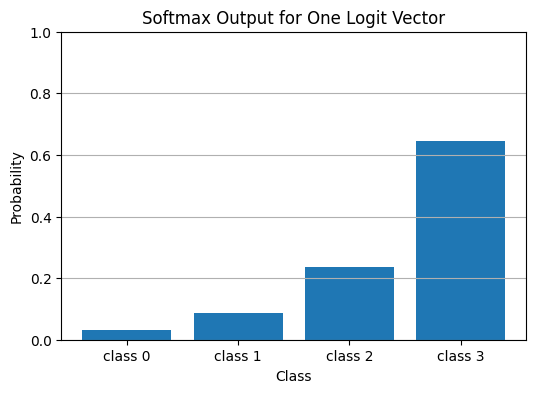

In [15]:
def softmax(x):
    e_x = np.exp(x) 
    return e_x / e_x.sum()

# Example input logits for 4 classes
logits = np.array([1.0, 2.0, 3.0, 4.0])
softmax_probs = softmax(logits)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(range(len(logits)), softmax_probs, tick_label=[f'class {i}' for i in range(len(logits))])
plt.title("Softmax Output for One Logit Vector")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

__Neural networks with hidden layers__

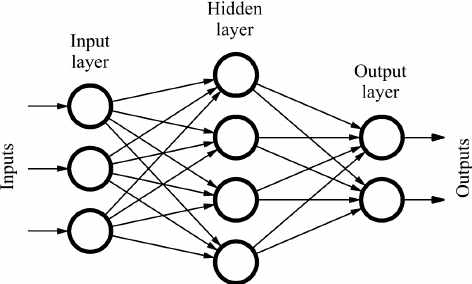

## Learning

The input layer receives data, which is then processed through one or more hidden layers, and finally produces an output in the output layer. During training, the ANN adjusts the weights to minimize the difference between its predicted output and the desired output, using a technique called `backpropagation`, which involves a minimisation such as `stochastic gradient descent (SGD)`. This process involves propagating the error backward through the network, updating the weights accordingly, and iteratively repeating this process until the network learns to produce accurate predictions.

The full review of the process is beyond the scope of this demo.


When the architecture of the model is defined, we need to specify the details of the learning procedure. It is done using the method `.compile()`. The main parameters  are:

- `loss` - loss function - a function whose value is minimized throughout the training;
- `optimizer` - optimization algorithm that is used for parameters' update. For most of the tasks, the __Adam optimizer__ works the best, but [optimisers](https://keras.io/api/optimizers/) for more options.
- `metrics` - quality metrics that are being evaluated and reported throughout the training procedure.

To train the model, similarly as in Scikit-learn, we use the method `.fit()`. The main parameters are:
- `x` - input data;
- `y` - target data;
- `batch size` - number of training samples that need to go through the model before the weights and biases of the model will be updated;
- `epochs` - number of times the complete dataset will be passed through the network;


## (1) Iris dataset

Here we create a network with:
- input layer with 4 neurons one for each feature
- hidden layer with 16 neurons
- output layer with 3 neurons, one for each Iris class.

In [16]:
import keras
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
# Data preparation
iris = pd.read_csv('iris.csv')
features = iris.columns.drop('class')
target = 'class'
class_names = ['setosa','versicolor','virginica']
X, Y = iris[features], iris[target]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

le = LabelEncoder()  # class instance
le.classes_
le.fit(y_train);

y_train = le.transform(y_train)
y_test = le.transform(y_test)


scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

# one-hot / dummy matrix 
y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Set up of input, hidden and output layers

In [20]:

model = keras.Sequential(
    [
        keras.layers.Input(shape=(4,), name="In"),
        keras.layers.Dense(16, activation='relu', name="L1"),
        keras.layers.Dense(3, activation='softmax', name="Out")
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Out (Dense)                     │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(4,), name="In"),
        keras.layers.Dense(80, activation='relu'),
        keras.layers.Dense(170, activation='relu'),
        keras.layers.Dense(3, activation='softmax', name="Out")
    ]
)

model.compile(
    loss=keras.losses.CategoricalCrossentropy(), ### loss function
    optimizer=keras.optimizers.Adam(), ### optimizer
    metrics=[        
        keras.metrics.CategoricalAccuracy(name="accuracy"), ## metric to assess performance
    ],
)

history = model.fit(
    x_train,
    y_train_oh,
    validation_data=(x_test, y_test_oh),
    batch_size=10,
    epochs=500,
    shuffle=True,
    verbose=1
)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5574 - loss: 1.0062 - val_accuracy: 0.8667 - val_loss: 0.7115
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8489 - loss: 0.6631 - val_accuracy: 0.7667 - val_loss: 0.5177
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8326 - loss: 0.5360 - val_accuracy: 0.9667 - val_loss: 0.4109
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8692 - loss: 0.4277 - val_accuracy: 0.8000 - val_loss: 0.3690
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.3722 - val_accuracy: 0.9000 - val_loss: 0.3308
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9554 - loss: 0.3040 - val_accuracy: 0.9667 - val_loss: 0.2728
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.2629 - val_accuracy: 0.9667 - val_loss: 0.2399
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9721 - loss: 0.2581 - val_accuracy: 0.9667 -

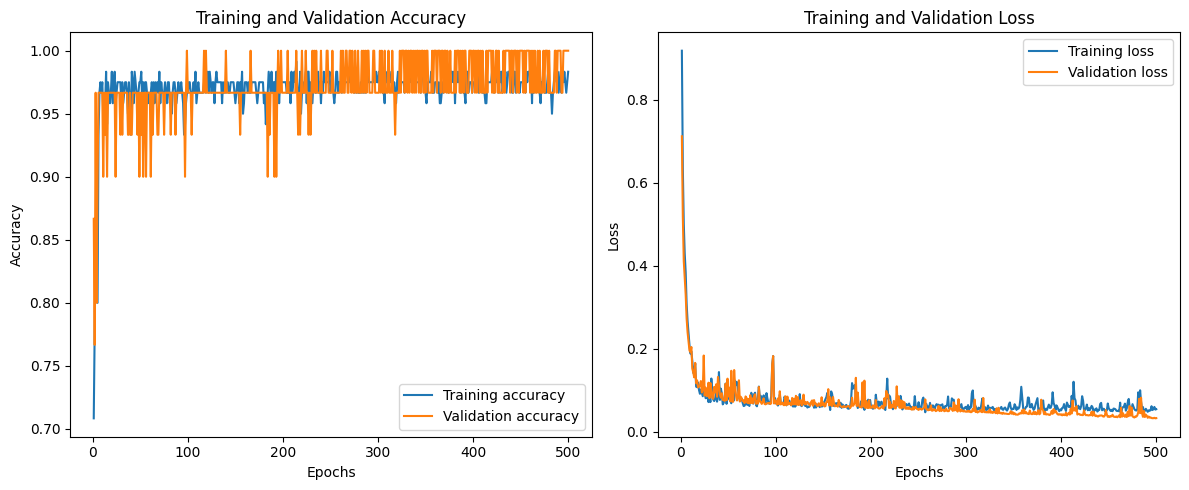

In [26]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
y_pred = model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[1.8862575e-05, 9.9968946e-01, 2.9169841e-04],
       [1.0000000e+00, 6.4274952e-10, 2.3695425e-24],
       [5.3714193e-09, 1.0705751e-04, 9.9989295e-01],
       [4.2633030e-05, 9.9884498e-01, 1.1123400e-03],
       [1.4107336e-05, 9.9900866e-01, 9.7721932e-04],
       [1.0000000e+00, 7.9535711e-09, 3.2555184e-22],
       [4.4743992e-06, 9.9999547e-01, 2.1837904e-08],
       [7.5844250e-06, 1.6104445e-02, 9.8388791e-01],
       [1.0265966e-04, 5.6455469e-01, 4.3534267e-01],
       [6.8447953e-06, 9.9999249e-01, 7.1552904e-07],
       [3.2534474e-05, 8.4014170e-02, 9.1595328e-01],
       [1.0000000e+00, 1.0255961e-08, 3.3667505e-21],
       [1.0000000e+00, 1.3407879e-10, 7.5240404e-25],
       [1.0000000e+00, 9.5284785e-09, 2.0203731e-21],
       [1.0000000e+00, 4.0169643e-10, 3.5191247e-24],
       [1.1546568e-05, 9.9994969e-01, 3.8738563e-05],
       [4.2451677e-07, 9.4669947e-04, 9.9905282e-01],
       [1.2843569e-05, 9.9998218e-01, 5.0244266e-06],
       [4.4084747e-05, 9.992

In [29]:
y_pred_arg = np.argmax(y_pred, axis=1)
y_pred_arg

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [30]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

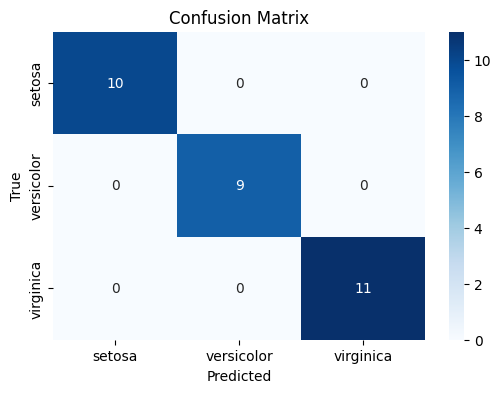

In [31]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_arg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Over/Under-fitting

Models are optimised to best fit the training data. The process may be exaggerated thus far that the `training error`, model's error on training data, is minimised. However, this will not guarantee the model's performance on unobserved input, i.e. high `test error`.

- Overfitting  : model fails to perform on new input, large difference between training and test error
- Underfitting : model fails to fit the data, i.e. high training error


### (2) MNIST dataset

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database is a well-known collection of handwritten digit images used for training and testing machine learning algorithms, particularly in the field of image recognition. MNIST stands for Modified National Institute of Standards and Technology database. The database contains 60,000 training examples and 10,000 testing examples. Each example is a grayscale image of a handwritten digit (0 to 9) with a resolution of 28x28 pixels. The images are normalized and centered, making them consistent for analysis.


In [37]:
# Import the dataset from the Keras collection (requires tensorflow,tensorrt)
from keras.api.datasets import mnist
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)

The data is already divided into separate training and test sets.

In [162]:
type(x_train), x_train.shape

(numpy.ndarray, (60000, 28, 28))

The training set is composed of 60000 matrices of the shape 28x28. We can visualise the content of the matrix with the matplotlib function `.imshow()`. Below is a sample of 100:

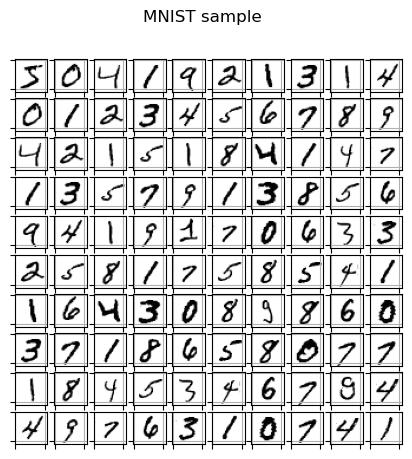

In [164]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10,figsize=(5,5))
fig.suptitle("MNIST sample")
for i in range(10):
    for j in range(10):
        axes[i,j].grid('on')
        axes[i,j].set_xticklabels([])
        axes[i,j].set_yticklabels([])
        axes[i,j].imshow(x_train[(i+1)*(j+1)-1], cmap='Greys')


Here is the type and dimensions of each matrix:

In [166]:
print(x_train.shape, x_train.dtype, x_train.min(), x_train.max())
print(y_train.shape, y_train.dtype, y_train.min(), y_train.max())

(60000, 28, 28) uint8 0 255
(60000,) uint8 0 9


In [168]:
# Rescale/normalise ( grey-scale [0,255] to [0,1] )
x_train= x_train/255
x_test=x_test/255
x_train.min(), x_train.max()

(0.0, 1.0)

The second step is to __reshape__ the image so that it can be "fed" into ML model.

Each image should be represented as 3D tensor:
- First two dimensions of which correspond to the actual shape of an image (in our case 28x28),
- The third dimension tells how many color channels has the image.

The MNIST images are grayscale, so the color channel is only one -> the last dimension of the resulting tensor should be equal to 1.

Beware that in case of Red-Green-Blue (RGB) images (with three color channels) the last dimension has to be equal to 3.

In [170]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [172]:
# One-Hot encoding of training labels
y_train_oh = np.eye(10)[y_train]
y_test_oh = np.eye(10)[y_test]
y_train_oh[0], y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 5)

In [174]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(28,28,1)),
        keras.layers.Flatten(name="In"),
        keras.layers.Dense(16, activation='relu', name="L1"),
        keras.layers.Dense(16, activation='relu', name="L2"),
        keras.layers.Dense(10, activation='softmax', name="Out")
    ]
)
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ In (Flatten)                    │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Out (Dense)                     │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
28*28, 28*28*16+16, 16*16+16,16*10+10 

(784, 12560, 272, 170)

In [178]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[        
        keras.metrics.CategoricalAccuracy(name="accuracy"),
    ],
)

# Fit
history = model.fit(
    x_train,
    y_train_oh,
    validation_data=(x_test, y_test_oh),
    batch_size=128,
    epochs=50,
    validation_split=0.0,
    shuffle=True,
    verbose=1
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.3416 - loss: 7.1112 - val_accuracy: 0.5901 - val_loss: 1.2607
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.6242 - loss: 1.1495 - val_accuracy: 0.6800 - val_loss: 0.9676
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6961 - loss: 0.9331 - val_accuracy: 0.7617 - val_loss: 0.7916
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7669 - loss: 0.7527 - val_accuracy: 0.8082 - val_loss: 0.6551
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8116 - loss: 0.6515 - val_accuracy: 0.8392 - val_loss: 0.6193
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.8383 - loss: 0.5803 - val_accuracy: 0.8496 - val_loss: 0.5431
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.8561 - loss: 0.5261 - val_accuracy: 0.8808 - val_loss: 0.4633
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.8779 - loss: 0.4589 - 

### Loss/accuracy curves 

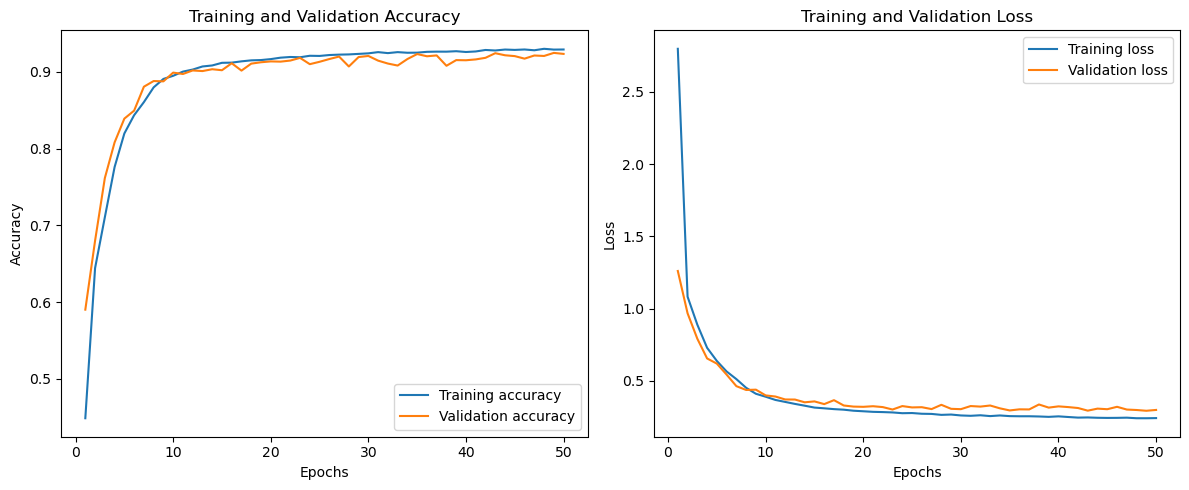

In [182]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [184]:
prediction = model.predict(x_test, verbose=0)
x_test.shape, prediction.shape

((10000, 28, 28), (10000, 10))

1.0

For each item of the test set we obtain a vector of size 10 corresponding to the activation function of the output layer. The  output vector represents the probabilities for each digit in one-hot encoding:

In [187]:
# Probabilities
prediction[0]

array([2.8516657e-08, 1.8823428e-08, 2.9422802e-06, 8.0007467e-06,
       3.0125402e-15, 7.6939555e-10, 2.4203511e-28, 9.9998903e-01,
       4.2056856e-09, 1.6271584e-09], dtype=float32)

In [189]:
prediction[0].sum()      # sum (roughly) to 1

1.0

In [191]:
np.argmax(prediction[0]) # highest probability is the prediction

7

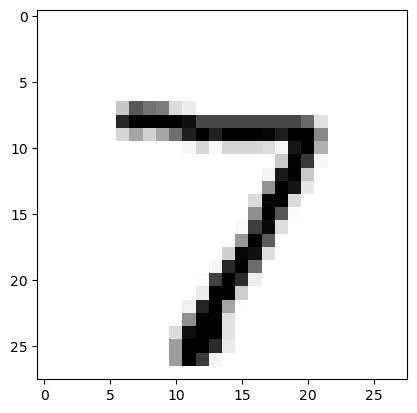

In [193]:
plt.imshow(x_test[0],cmap='Greys'); # image that was classified

In [195]:
y_test[0] # label of the image

7

We can calculate the percentage of misclassification:

In [197]:
m = model.evaluate(x_test,y_test_oh, verbose=0)
f"(%) : {(1- m[1])*100:.2f}"

'(%) : 7.64'

and one of them is shown below:

Text(0.5, 1.0, 'predicted: 5,  actual: 5')

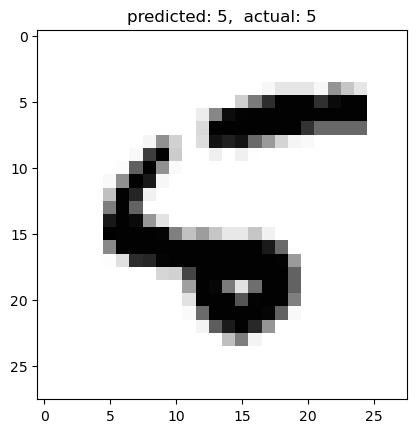

In [199]:
plt.imshow(x_test[8].reshape(28,28),cmap='Greys')
plt.title(f"predicted: {np.argmax(prediction[8])},  actual: {y_test[8]}")

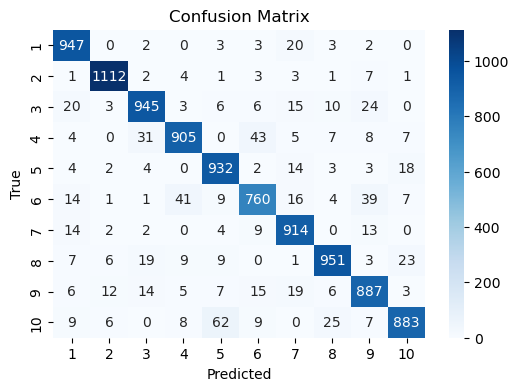

In [248]:
y_pred_arg = np.argmax(prediction, axis=1)
cm = confusion_matrix(y_test, y_pred_arg)
class_names=['1','2','3','4','5','6','7','8','9','10']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## NOTES

keras -> classification output -> softmax

loss function values as small as possible = good bc then discrepancy between validation & test values small 
- start with 1 layer and then check and increase if needed 